<a href="https://colab.research.google.com/github/brittabeta/Learning-Sandbox/blob/main/Real_World_Data_Wrangling_Understanding_Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real World Data Wrangling

National Unemployment Rate (from the Current Population Survey)

>> A monthly household survey provides comprehensive information on the employment and unemployment of the population classified by age, sex, race, and other characteristics. [U.S. Bureau of Labor Statistics](https://www.bls.gov/bls/unemployment.htm)

Current Population Survey (CPS)

>> The Current Population Survey (CPS) is a monthly survey of households conducted by the Bureau of Census for the Bureau of Labor Statistics. It provides a comprehensive body of data on the labor force, employment, unemployment, persons not in the labor force, hours of work, earnings, and other demographic and labor force characteristics. [Labor Force Statistics from the Current Population Survey](https://www.bls.gov/cps/)

Not Just One Rate: U-3 Official Unemployment Rate

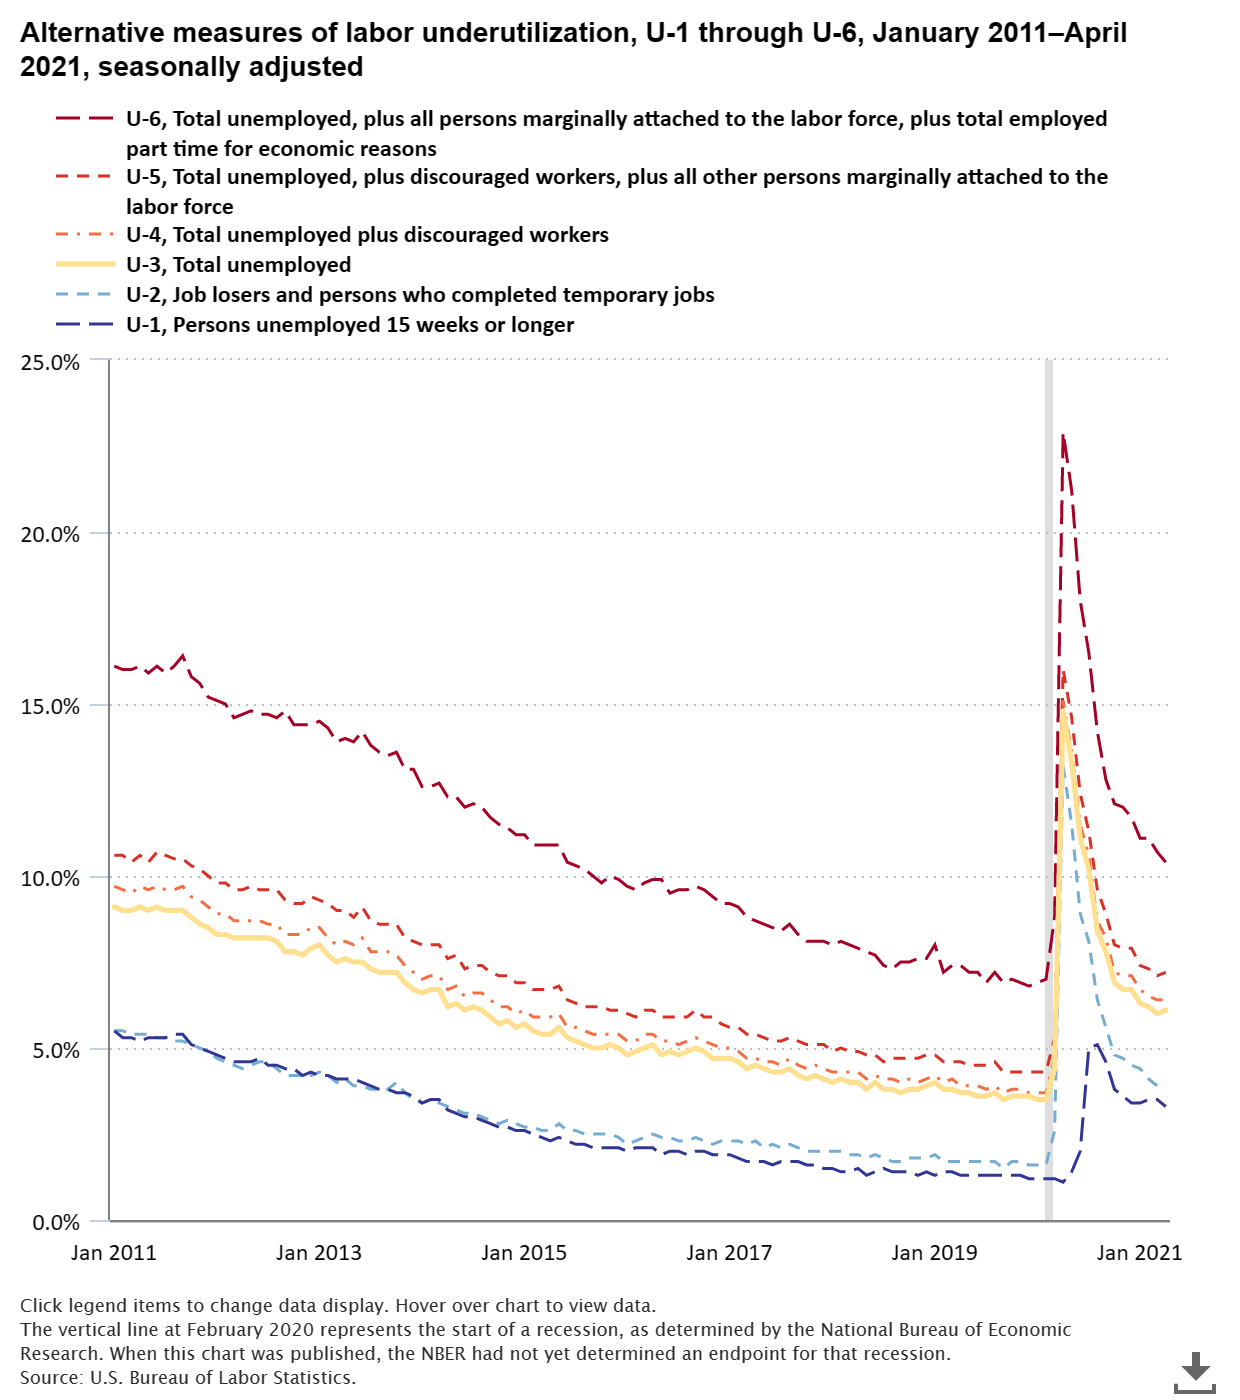



Alternative Measures of Labor Underutilization

>> BLS publishes six "alternative measures of labor underutilization," known as U-1 through U-6, in each month's Employment Situation news release...the U-3 rate is the total number of unemployed people as a percentage of the labor force. U-1 and U-2 are more narrowly defined and are always lower than the official unemployment rate, while U-4, U-5, and U-6 are more broadly defined and always higher. [BLS TED: The Economics Daily](https://www.bls.gov/opub/ted/2021/u-3-was-6-1-percent-u-6-was-10-4-percent-in-april-2021.htm)

U-1 through U-6 Definitions

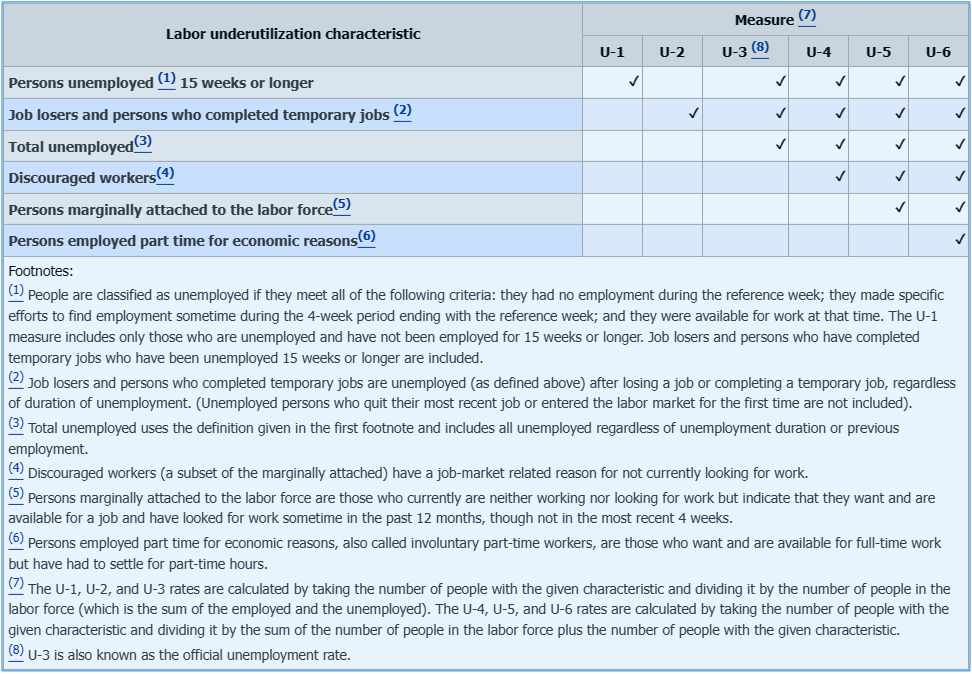

# Data Extraction

[Federal Reserve Economic Database (FRED)](https://fred.stlouisfed.org/series/U6RATE)

* Access U-6 rate from 1948-01-01 to 2023-03-01
* Add U-3 rate: Edit Graph > Add Line "Unemployment Rate" > Add Series > U-3 rate from 1994-01-01 
* Download Excel format for learning purposes
* Save as .xlsx

Note: There is even more than just headers and data, the file also includes additional headers and definitions with tabular data below.  This introduces a topic of handling metadata.

.xls .xlsx versus .cvs
* Not-text spreadsheets documents have many formatting options
* Values that appear on screen might actually be another RAW value
* Spreadsheets may have more than one sheet
* .csv: reduce file size, raw data ~ real data visualized, text-based in tabular structure

# Copy Excel raw data to a .csv
Use openpyxl to access, parse .xlsx file
https://pypi.org/project/openpyxl/

In [3]:
# install openpyxl library 
! pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# import load_workbook to read an Excel Spreadsheet
from openpyxl import load_workbook

In [5]:
# import csv to create csv output and write rows to the csv
import csv

In [8]:
# open the spreadsheet using load_workbook()
source_workbook = load_workbook(filename='/content/fredgraph_unemployment U6 U3.xlsx')

In [9]:
# obtain sheet names
print(source_workbook.sheetnames)

['FRED Graph']


In [11]:
source_workbook.properties

<openpyxl.packaging.core.DocumentProperties object>
Parameters:
creator='Britta Smith', title=None, description=None, subject=None, identifier=None, language=None, created=datetime.datetime(2023, 4, 20, 0, 12, 12), modified=datetime.datetime(2023, 4, 20, 0, 12, 34), lastModifiedBy='bretana1226@gmail.com', category=None, contentStatus=None, version=None, revision=None, keywords=None, lastPrinted=None

In [10]:
# loop through the sheets in 'source_workbook'
# create an output file for each sheet of the workbook
# write rows to the csv output file
# loop through every row in the sheet
# store actual cell values for a given row in a list
# write constructed data row to output file
# close the output file csv
for sheet_num, sheet_name in enumerate(source_workbook.sheetnames):
  current_sheet = source_workbook[sheet_name]
  print(sheet_name)
  output_file = open('xlsx_'+sheet_name+'.csv','w')
  output_writer = csv.writer(output_file)
  for row in current_sheet.iter_rows():
    row_cells = []
    for cell in row:
      print(cell, cell.value) # to see what is going on in here
      row_cells.append(cell.value)
    output_writer.writerow(row_cells)
output_file.close()

FRED Graph
<Cell 'FRED Graph'.A1> FRED Graph Observations
<Cell 'FRED Graph'.B1> None
<Cell 'FRED Graph'.C1> None
<Cell 'FRED Graph'.A2> Federal Reserve Economic Data
<Cell 'FRED Graph'.B2> None
<Cell 'FRED Graph'.C2> None
<Cell 'FRED Graph'.A3> Link: https://fred.stlouisfed.org
<Cell 'FRED Graph'.B3> None
<Cell 'FRED Graph'.C3> None
<Cell 'FRED Graph'.A4> Help: https://fredhelp.stlouisfed.org
<Cell 'FRED Graph'.B4> None
<Cell 'FRED Graph'.C4> None
<Cell 'FRED Graph'.A5> Economic Research Division
<Cell 'FRED Graph'.B5> None
<Cell 'FRED Graph'.C5> None
<Cell 'FRED Graph'.A6> Federal Reserve Bank of St. Louis
<Cell 'FRED Graph'.B6> None
<Cell 'FRED Graph'.C6> None
<Cell 'FRED Graph'.A7> None
<Cell 'FRED Graph'.B7> None
<Cell 'FRED Graph'.C7> None
<Cell 'FRED Graph'.A8> U6RATE
<Cell 'FRED Graph'.B8> Total Unemployed, Plus All Persons Marginally Attached to the Labor Force, Plus Total Employed Part Time for Economic Reasons, as a Percent of the Civilian Labor Force Plus All Persons Margin

In [127]:
import pandas as pd

In [128]:
# load output file and take a look at the metadata
df = pd.read_csv('/content/xlsx_FRED Graph.csv')
df.head(20)

,FRED Graph Observations,Unnamed: 1,Unnamed: 2
0,Federal Reserve Economic Data,NaN,NaN
1,Link: https://fred.stlouisfed.org,NaN,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN,NaN
3,Economic Research Division,NaN,NaN
4,Federal Reserve Bank of St. Louis,NaN,NaN
5,NaN,NaN,NaN
6,U6RATE,"Total Unemployed, Plus All Persons Marginally ...",NaN
7,UNRATE,"Unemployment Rate, Percent, Monthly, Seasonall...",NaN
8,NaN,NaN,NaN
9,Frequency: Monthly,NaN,NaN


In [129]:
# we only want row 10 and greater
df = df.iloc[10:,:]
df.head()

,FRED Graph Observations,Unnamed: 1,Unnamed: 2
10,observation_date,U6RATE,UNRATE
11,1948-01-01 00:00:00,NaN,3.4
12,1948-02-01 00:00:00,NaN,3.8
13,1948-03-01 00:00:00,NaN,4
14,1948-04-01 00:00:00,NaN,3.9


In [130]:
# we want row indeces to go 0.... 
# also want to prevent pandas from saving the index as a column in the dataframe
df.reset_index(drop=True, inplace=True)
df.head()

,FRED Graph Observations,Unnamed: 1,Unnamed: 2
0,observation_date,U6RATE,UNRATE
1,1948-01-01 00:00:00,NaN,3.4
2,1948-02-01 00:00:00,NaN,3.8
3,1948-03-01 00:00:00,NaN,4
4,1948-04-01 00:00:00,NaN,3.9


In [131]:
# we want column names to be from the first row
df.columns = df.iloc[0]
df.head()

,observation_date,U6RATE,UNRATE
0,observation_date,U6RATE,UNRATE
1,1948-01-01 00:00:00,NaN,3.4
2,1948-02-01 00:00:00,NaN,3.8
3,1948-03-01 00:00:00,NaN,4
4,1948-04-01 00:00:00,NaN,3.9


In [132]:
# we want to drop the first row and have index still 0....
df = df.drop(labels=0)
df.reset_index(drop=True, inplace=True)

In [133]:
df.head()

,observation_date,U6RATE,UNRATE
0,1948-01-01 00:00:00,NaN,3.4
1,1948-02-01 00:00:00,NaN,3.8
2,1948-03-01 00:00:00,NaN,4
3,1948-04-01 00:00:00,NaN,3.9
4,1948-05-01 00:00:00,NaN,3.5


In [134]:
# what data types do we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   observation_date  903 non-null    object
 1   U6RATE            351 non-null    object
 2   UNRATE            903 non-null    object
dtypes: object(3)
memory usage: 21.3+ KB


In [135]:
# we want column 1 to be datetime
# we want columns 2 and 3 to be float
df['observation_date'] = pd.to_datetime(df['observation_date'], format='%Y/%m/%d %H:%M:%S')
df['U6RATE'] = df.U6RATE.astype(float)
df['UNRATE'] = df.UNRATE.astype(float)

In [136]:
df.head()

,observation_date,U6RATE,UNRATE
0,1948-01-01,NaN,3.4
1,1948-02-01,NaN,3.8
2,1948-03-01,NaN,4.0
3,1948-04-01,NaN,3.9
4,1948-05-01,NaN,3.5


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  903 non-null    datetime64[ns]
 1   U6RATE            351 non-null    float64       
 2   UNRATE            903 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 21.3 KB


Source: 
Practical Python Data Wrangling & Data Quality

Susan E. McGregor

O'Reilly Publishing: 2022